2023-06-20 20:19:58.791244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 20:19:58.895564: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-20 20:19:58.918704: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-20 20:19:59.300977: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

Attention weights for layer 23 (memorizing)


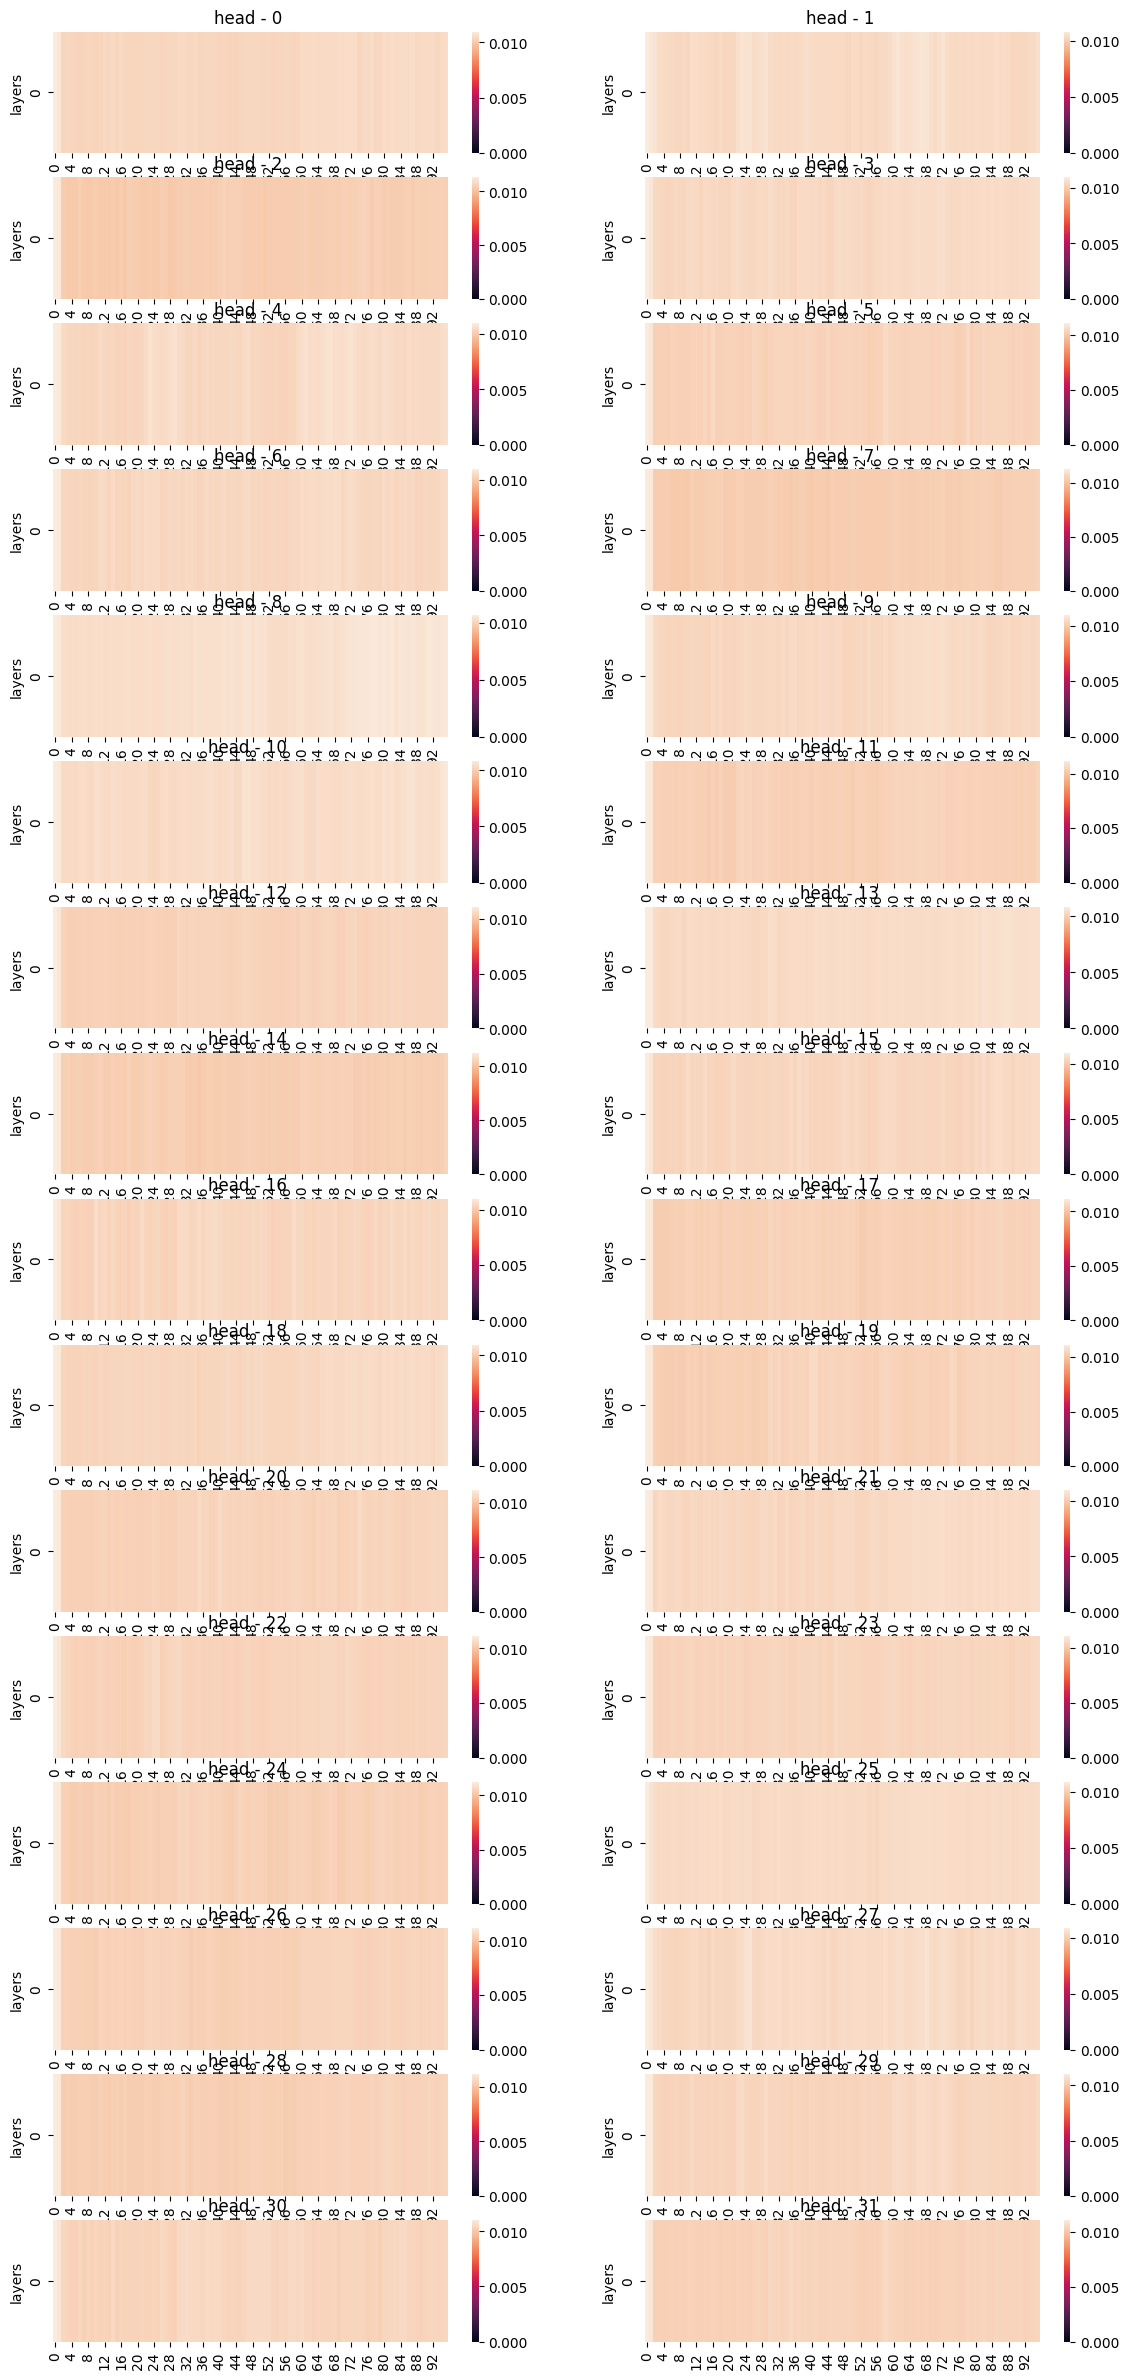

[tensor(0.0007), tensor(0.0006), tensor(0.0011), tensor(0.0007), tensor(0.0007), tensor(0.0008), tensor(0.0007), tensor(0.0010), tensor(0.0005), tensor(0.0007), tensor(0.0006), tensor(0.0009), tensor(0.0008), tensor(0.0006), tensor(0.0010), tensor(0.0007), tensor(0.0008), tensor(0.0009), tensor(0.0007), tensor(0.0009), tensor(0.0008), tensor(0.0007), tensor(0.0008), tensor(0.0008), tensor(0.0010), tensor(0.0006), tensor(0.0009), tensor(0.0007), tensor(0.0009), tensor(0.0007), tensor(0.0008), tensor(0.0008)]
1 32 1
Attention weights for layer 22 (NOT knn)


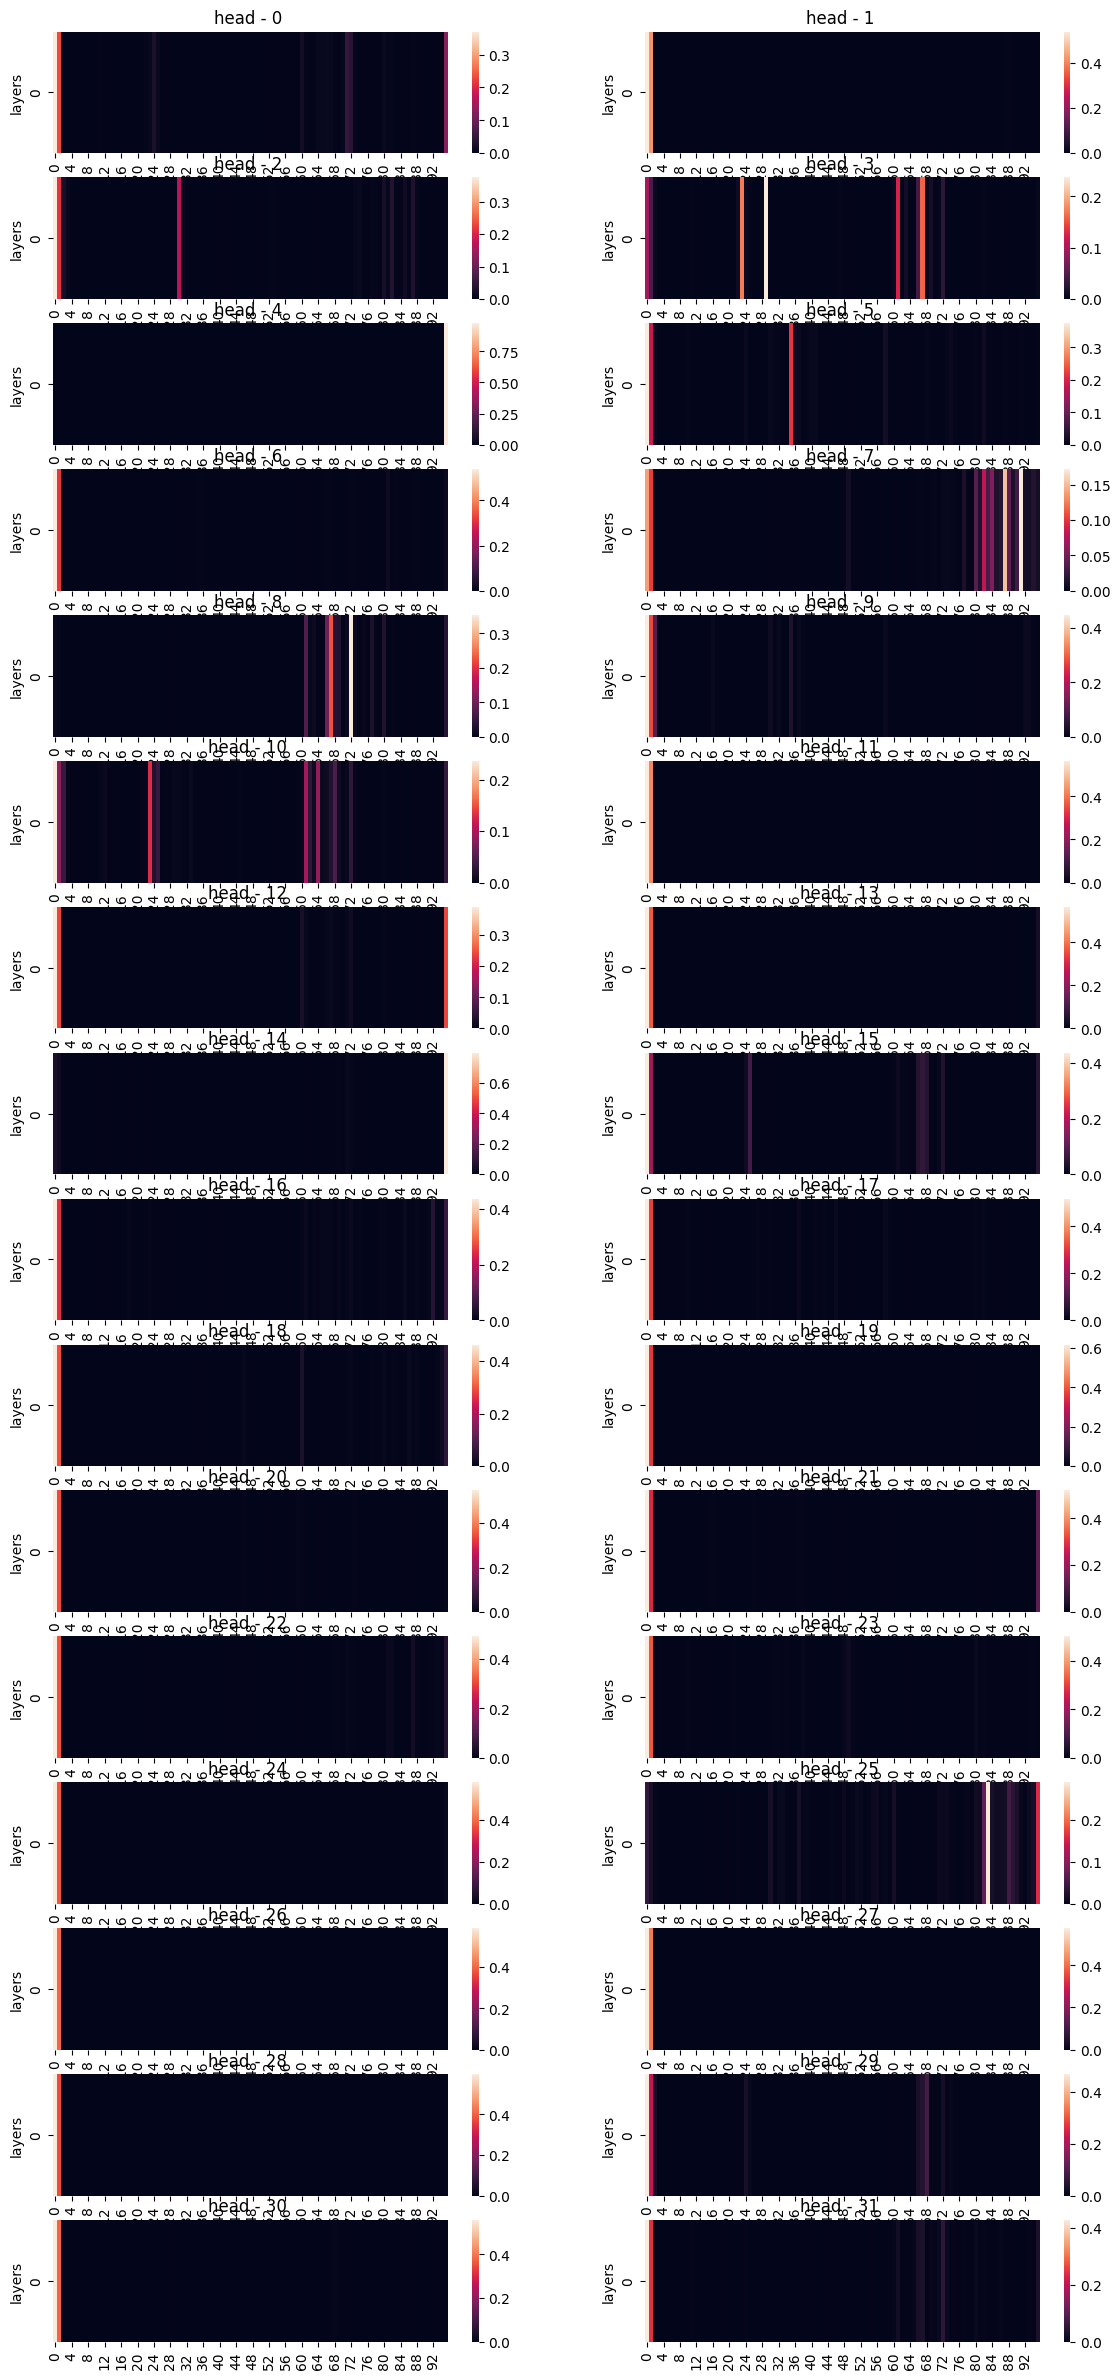

[tensor(0.3703), tensor(0.5393), tensor(0.3741), tensor(0.2365), tensor(0.9741), tensor(0.3744), tensor(0.5374), tensor(0.1720), tensor(0.3533), tensor(0.4462), tensor(0.2359), tensor(0.5636), tensor(0.3900), tensor(0.5653), tensor(0.7961), tensor(0.4355), tensor(0.4368), tensor(0.5175), tensor(0.4633), tensor(0.6173), tensor(0.5471), tensor(0.5184), tensor(0.4908), tensor(0.4991), tensor(0.5800), tensor(0.2883), tensor(0.5884), tensor(0.5752), tensor(0.5974), tensor(0.4700), tensor(0.5569), tensor(0.4266)]


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

x = torch.load('/home/mary/Desktop/jupN/response_24.pt', map_location=torch.device('cpu'))['attentions']
#print(len(x), type(x), len(x[0]), type(x[0]), x[0][0].shape, x[0][1].shape, x[1][0].shape, x[1][1].shape)

# 24 - new tokens num, 32 - layers, 

# №23 - mem layer
'''memorizing_layers = [24],'''
attentions = [i[23] for i in x]

gen_num = len(attentions) - 1
attn = attentions[gen_num]
attn = attn.permute(2,1,0,3)

layers = 1
heads = len(attn[0])
seqlen = len(attn)
#print(layers,heads,seqlen)
p_pos = 0
attn_pos = attn[p_pos]

cols = 2
rows = int(heads/cols)

fig, axes = plt.subplots( rows,cols, figsize = (14,30))
axes = axes.flat
print (f'Attention weights for layer 23 (memorizing)')
lst = []
for i,att in enumerate(attn_pos):
    #print(att)
    minim = att.min()
    maxim = att.max()
    lst.append(maxim-minim)
    sns.heatmap(att,vmin = 0, vmax = maxim,ax = axes[i])
    axes[i].set_title(f'head - {i} ' )
    axes[i].set_ylabel('layers')
    
plt.show()    
print(lst)


attentions = [i[22] for i in x]

gen_num = len(attentions) - 1
attn = attentions[gen_num]
#attn = attn.permute(2,1,0,3)

layers = 1
heads = len(attn[0])
seqlen = len(attn)
print(layers,heads,seqlen)
p_pos = 0
attn_pos = attn[p_pos]

fig, axes = plt.subplots( rows,cols, figsize = (14,30))
axes = axes.flat
print (f'Attention weights for layer 22 (NOT knn)')
lst = []
for i,att in enumerate(attn_pos):
    #print(att)
    minim = att.min()
    maxim = att.max()
    lst.append(maxim-minim)
    sns.heatmap(att,vmin = 0, vmax = maxim,ax = axes[i])
    axes[i].set_title(f'head - {i} ' )
    axes[i].set_ylabel('layers')
    
plt.show()
print(lst)    

24 <class 'tuple'> 32 <class 'tuple'> torch.Size([1, 32, 73, 73]) torch.Size([1, 32, 73, 73]) torch.Size([1, 32, 1, 74]) torch.Size([1, 32, 1, 74])
torch.Size([1, 32, 2, 96])
2 32 1
torch.Size([32, 2, 96])
Attention weights for layers 23, 29 (memorizing)


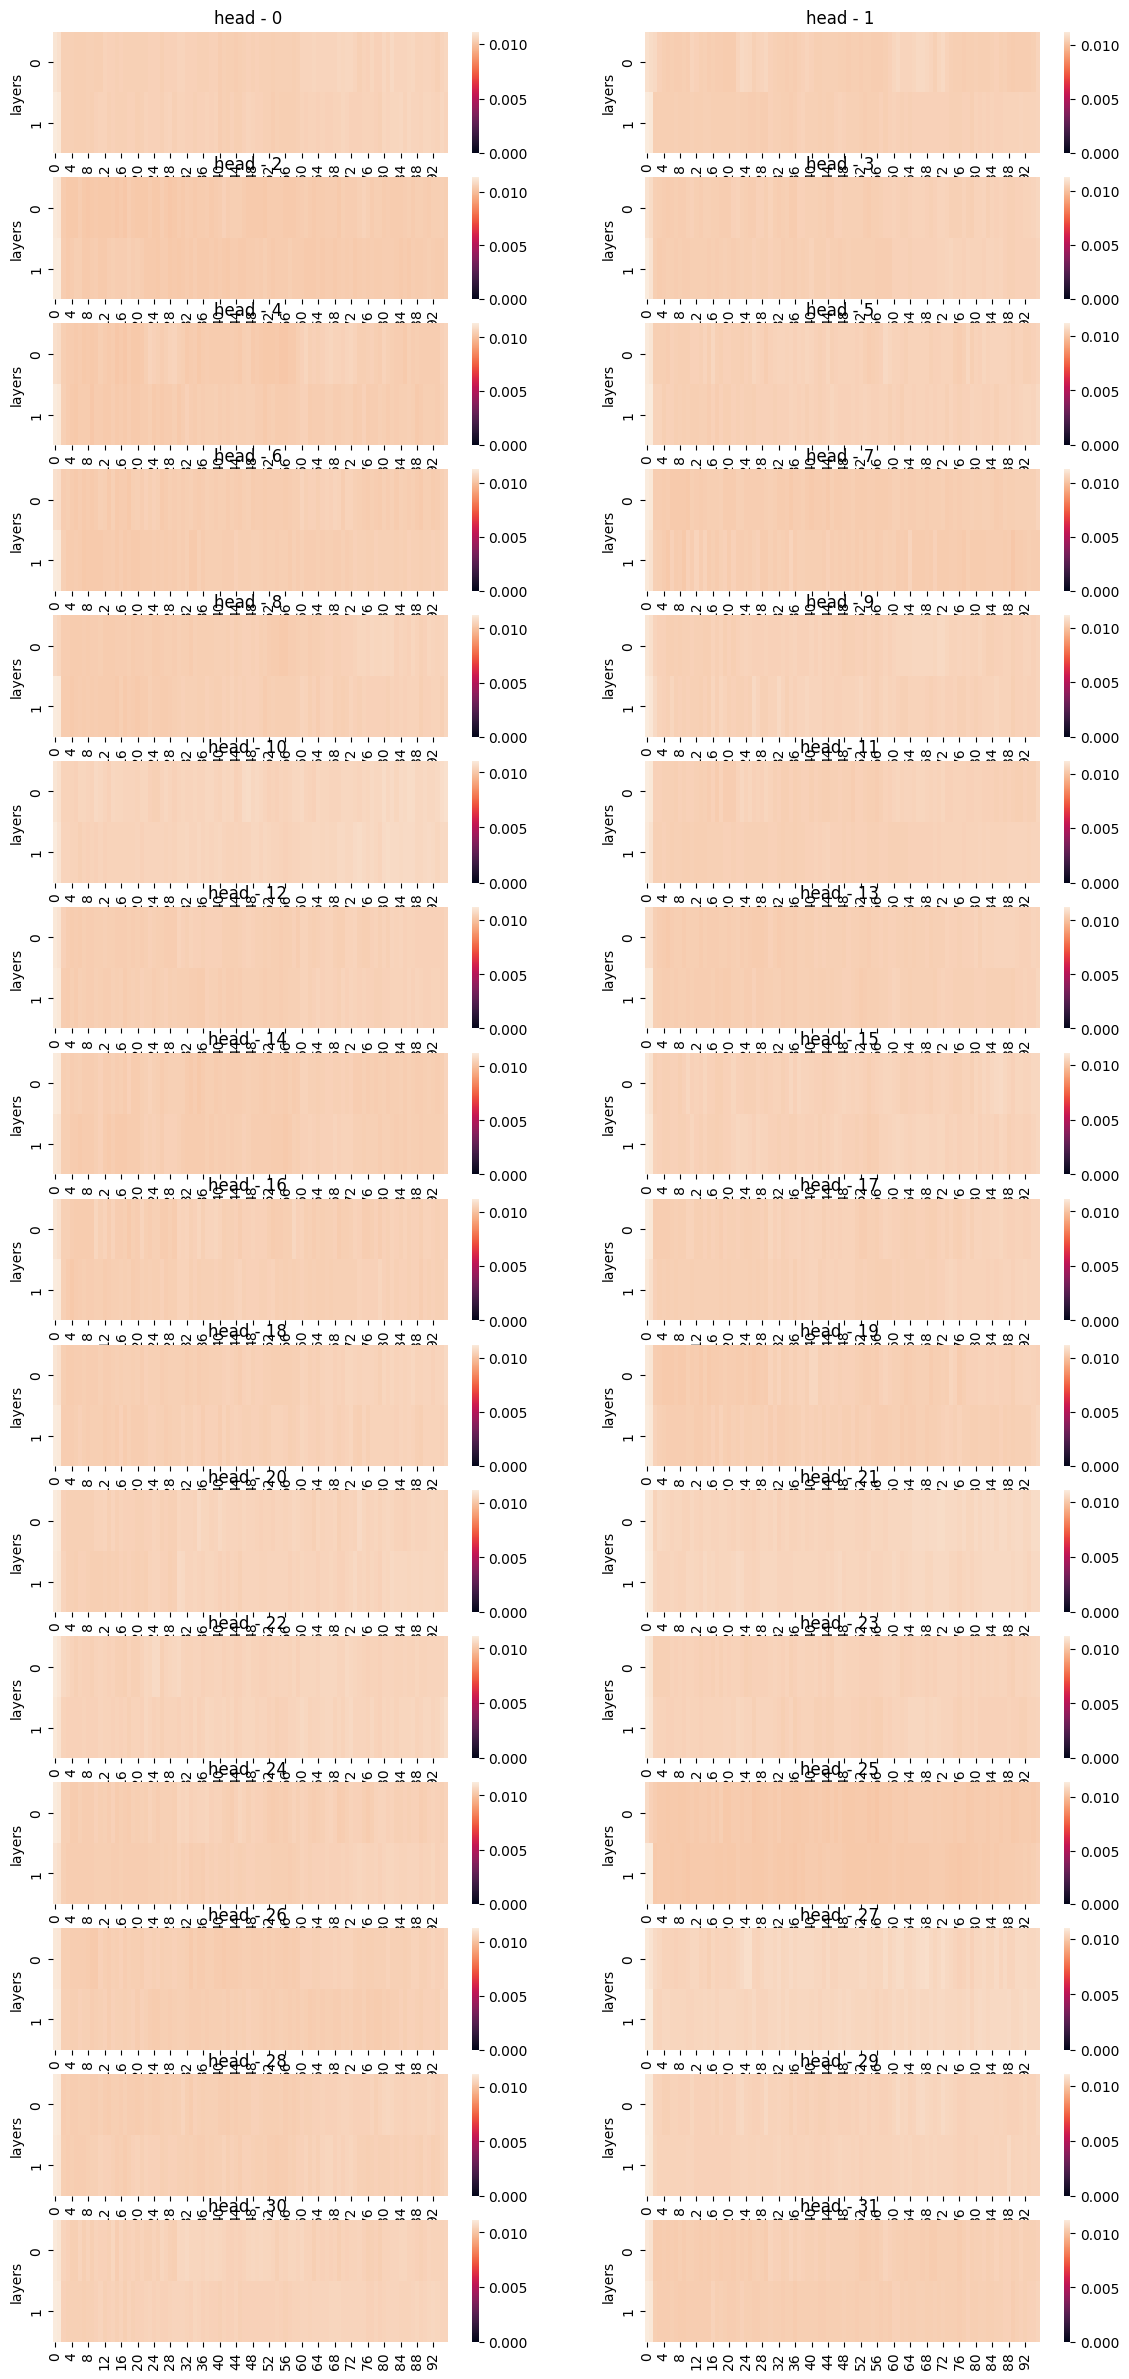

[tensor(0.0009), tensor(0.0009), tensor(0.0011), tensor(0.0010), tensor(0.0011), tensor(0.0009), tensor(0.0010), tensor(0.0011), tensor(0.0010), tensor(0.0009), tensor(0.0008), tensor(0.0009), tensor(0.0009), tensor(0.0010), tensor(0.0010), tensor(0.0009), tensor(0.0010), tensor(0.0009), tensor(0.0009), tensor(0.0010), tensor(0.0009), tensor(0.0008), tensor(0.0008), tensor(0.0008), tensor(0.0010), tensor(0.0011), tensor(0.0010), tensor(0.0008), tensor(0.0010), tensor(0.0008), tensor(0.0009), tensor(0.0010)]
torch.Size([1, 32, 2, 96])
Attention weights for layer 22, 28 (NOT knn)


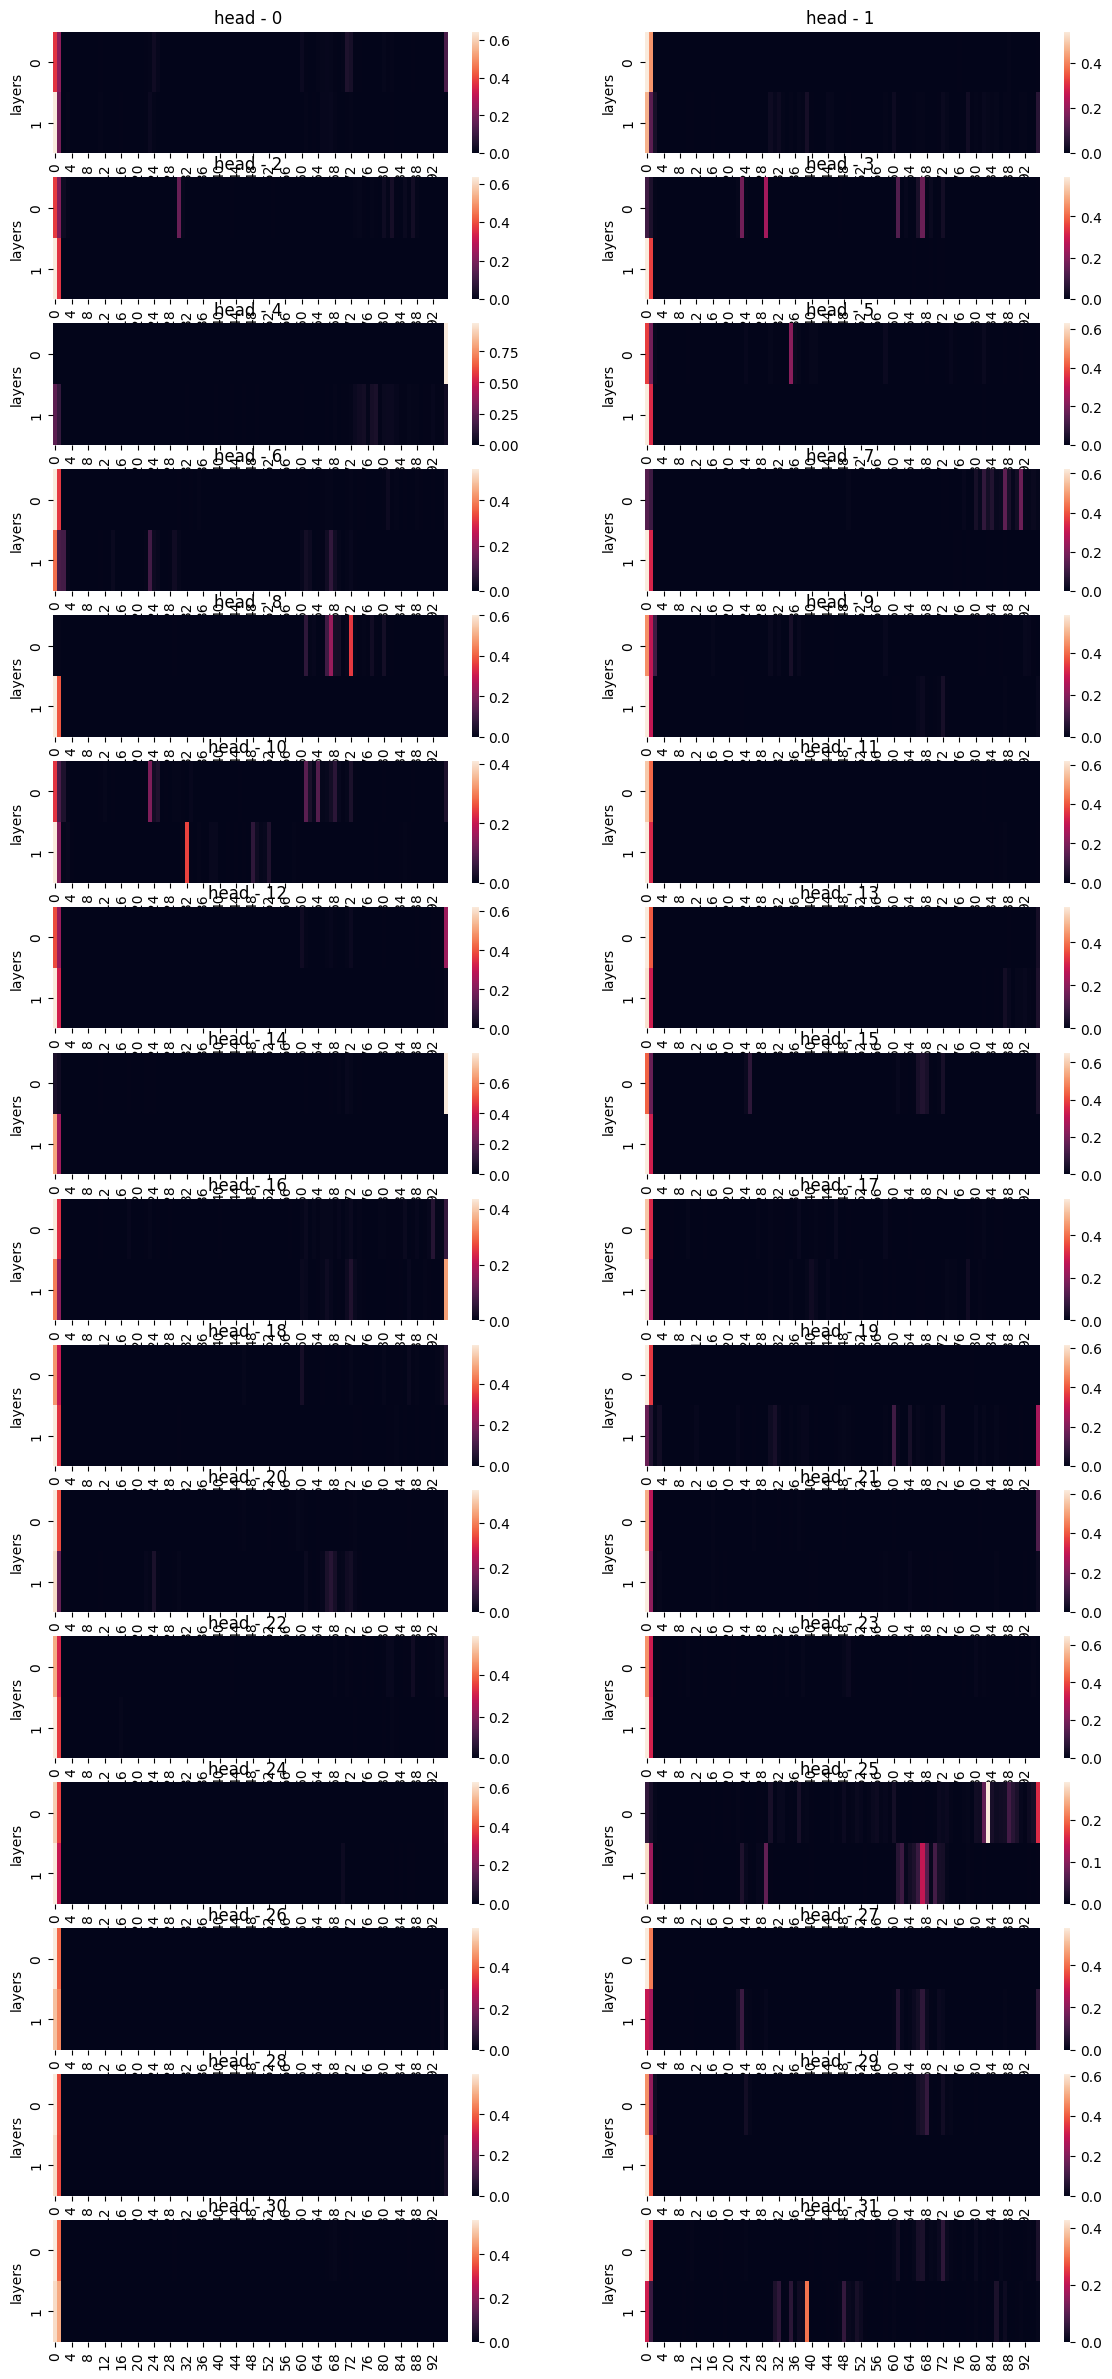

[tensor(0.6433), tensor(0.5393), tensor(0.6330), tensor(0.5878), tensor(0.9741), tensor(0.6302), tensor(0.5374), tensor(0.6218), tensor(0.6005), tensor(0.5824), tensor(0.4103), tensor(0.6200), tensor(0.6219), tensor(0.5653), tensor(0.7961), tensor(0.6514), tensor(0.4370), tensor(0.5735), tensor(0.5900), tensor(0.6173), tensor(0.5471), tensor(0.6165), tensor(0.5868), tensor(0.6440), tensor(0.6266), tensor(0.2883), tensor(0.5884), tensor(0.5752), tensor(0.5974), tensor(0.6078), tensor(0.5569), tensor(0.4267)]


In [2]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

x = torch.load('response_24_30.pt', map_location=torch.device('cpu'))['attentions']
print(len(x), type(x), len(x[0]), type(x[0]), x[0][0].shape, x[0][1].shape, x[1][0].shape, x[1][1].shape)

# №23, 29 - mem layer
'''memorizing_layers = [24, 30],'''
attentions = [(i[23], i[29]) for i in x]

gen_num = len(attentions) - 1
attn = attentions[gen_num]
attn23 = attn[0].permute(2,1,0,3)
attn30 = attn[1].permute(2,1,0,3)

attn = torch.cat((attn23, attn30), dim=2)
print(attn.shape)

layers = len(attn[0][0])
heads = len(attn[0])
seqlen = len(attn)
print(layers,heads,seqlen)
p_pos = 0
attn_pos = attn[p_pos]
print(attn_pos.shape)


cols = 2
rows = int(heads/cols)

fig, axes = plt.subplots( rows,cols, figsize = (14,30))
axes = axes.flat
print (f'Attention weights for layers 23, 29 (memorizing)')
lst = []
for i,att in enumerate(attn_pos):
    #print(att)
    minim = att.min()
    maxim = att.max()
    lst.append(maxim-minim)
    sns.heatmap(att,vmin = 0, vmax = maxim,ax = axes[i])
    axes[i].set_title(f'head - {i} ' )
    axes[i].set_ylabel('layers')
    
plt.show()    
print(lst)


attentions = [(i[22], i[28]) for i in x]

gen_num = len(attentions) - 1
attn = attentions[gen_num]
attn23 = attn[0].permute(2,1,0,3)
attn30 = attn[1].permute(2,1,0,3)

attn = torch.cat((attn23, attn30), dim=2)
print(attn.shape)

layers = len(attn[0][0])
heads = len(attn[0])
p_pos = 0
attn_pos = attn[p_pos]

fig, axes = plt.subplots( rows,cols, figsize = (14,30))
axes = axes.flat
print (f'Attention weights for layer 22, 28 (NOT knn)')
lst = []
for i,att in enumerate(attn_pos):
    #print(att)
    minim = att.min()
    maxim = att.max()
    lst.append(maxim-minim)
    sns.heatmap(att,vmin = 0, vmax = maxim,ax = axes[i])
    axes[i].set_title(f'head - {i} ' )
    axes[i].set_ylabel('layers')
    
plt.show()
print(lst)    